In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pylab as plt
import plotly.express as px
import seaborn as sns

In [2]:
movies = pd.read_csv('data/imdb_top_1000.csv')

In [3]:
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
movies.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
movies.drop(['Poster_Link', 'Overview'], axis=1, inplace=True)

# What is the most common rate value?

In [6]:
movies.groupby('IMDB_Rating')['IMDB_Rating'].count().sort_values(ascending=False)

IMDB_Rating
7.7    157
7.8    151
8.0    141
8.1    127
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
9.3      1
Name: IMDB_Rating, dtype: int64

## Who is the most popular actor?

In [7]:
movies[['Star1', 'Star2', 'Star3', 'Star4']].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False).head(10)

Robert De Niro       17.0
Tom Hanks            14.0
Al Pacino            13.0
Brad Pitt            12.0
Clint Eastwood       12.0
Matt Damon           11.0
Leonardo DiCaprio    11.0
Christian Bale       11.0
James Stewart        10.0
Humphrey Bogart       9.0
dtype: float64

In [8]:
movies['Star1'].value_counts()

Star1
Tom Hanks          12
Robert De Niro     11
Al Pacino          10
Clint Eastwood     10
Humphrey Bogart     9
                   ..
Preity Zinta        1
Javier Bardem       1
Ki-duk Kim          1
Vladimir Garin      1
Robert Donat        1
Name: count, Length: 660, dtype: int64

## How much money heve movies with De Niro earnd?

In [9]:
movies.query('Star1 == "Robert De Niro"')['Gross'].dropna().str.replace(',', '').astype(int).sum()

323185537

## What is the average rate of movies with De Niro?

In [10]:
movies.query('Star1 == "Robert De Niro"')['IMDB_Rating'].mean()

8.07272727272727

## What is the most voted movie?

In [11]:
movies.loc[movies['No_of_Votes'].idxmax()]

Series_Title     The Shawshank Redemption
Released_Year                        1994
Certificate                             A
Runtime                           142 min
Genre                               Drama
IMDB_Rating                           9.3
Meta_score                           80.0
Director                   Frank Darabont
Star1                         Tim Robbins
Star2                      Morgan Freeman
Star3                          Bob Gunton
Star4                      William Sadler
No_of_Votes                       2343110
Gross                          28,341,469
Name: 0, dtype: object

## What is a average number of votes on movies with Tom Hanks?

In [12]:
movies.query('Star1 == "Tom Hanks"')['No_of_Votes'].mean()

667816.75

## Does De Niro and Hanks played together in one movie?

In [13]:
movies[((movies['Star1']=='Tom Hanks')\
        | (movies['Star2']=='Tom Hanks')\
        | (movies['Star3']=='Tom Hanks')\
        | (movies['Star4']=='Tom Hanks'))\
        & ((movies['Star1']=='Robert De Niro')\
        | (movies['Star2']=='Robert De Niro')\
        | (movies['Star3']=='Robert De Niro')\
        | (movies['Star4']=='Robert De Niro'))]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


## In which movies Al Pacino and Robert De niro played together?

In [14]:
movies[((movies['Star1']=='Al Pacino')\
        | (movies['Star2']=='Al Pacino')\
        | (movies['Star3']=='Al Pacino')\
        | (movies['Star4']=='Al Pacino'))\
        & ((movies['Star1']=='Robert De Niro')\
        | (movies['Star2']=='Robert De Niro')\
        | (movies['Star3']=='Robert De Niro')\
        | (movies['Star4']=='Robert De Niro'))]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
164,Heat,1995,A,170 min,"Crime, Drama, Thriller",8.2,76.0,Michael Mann,Al Pacino,Robert De Niro,Val Kilmer,Jon Voight,577113,"67,436,818"
484,The Irishman,2019,R,209 min,"Biography, Crime, Drama",7.9,94.0,Martin Scorsese,Robert De Niro,Al Pacino,Joe Pesci,Harvey Keitel,324720,"7,000,000"


## With which actor Robert De Niro plays the most often?

In [15]:
de_niro_mov = movies[(movies['Star1']=='Robert De Niro')\
                    | (movies['Star2']=='Robert De Niro')\
                    | (movies['Star3']=='Robert De Niro')\
                    | (movies['Star4']=='Robert De Niro')]

In [16]:
de_niro_mov[['Star1', 'Star2', 'Star3', 'Star4']].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False).head()

Robert De Niro    17.0
Joe Pesci          4.0
Al Pacino          3.0
James Woods        2.0
Bradley Cooper     1.0
dtype: float64

In [17]:
movies.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [18]:
rate_gross = movies[['IMDB_Rating', 'Gross', 'No_of_Votes']].copy()

In [19]:
rate_gross['Gross'] = rate_gross['Gross'].dropna().str.replace(',', '').astype(int)

In [20]:
rate_gross_corr = rate_gross[['IMDB_Rating', 'Gross', 'No_of_Votes']].corr()
rate_gross_corr

,IMDB_Rating,Gross,No_of_Votes
IMDB_Rating,1.000000,0.095923,0.494979
Gross,0.095923,1.000000,0.574393
No_of_Votes,0.494979,0.574393,1.000000


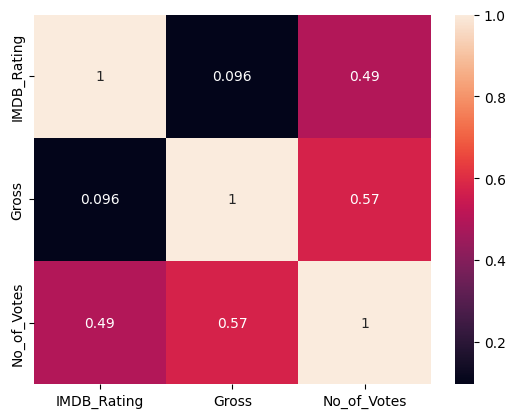

In [21]:
sns.heatmap(rate_gross_corr, annot=True)
plt.show()

In [22]:
stars_popularity = movies[['Star1', 'Star2', 'Star3', 'Star4']].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)

In [23]:
stars_popularity.shape

(2709,)

In [24]:
stars_popularity

Robert De Niro    17.0
Tom Hanks         14.0
Al Pacino         13.0
Brad Pitt         12.0
Clint Eastwood    12.0
                  ... 
Jack Benny         1.0
Jack Kehoe         1.0
Jack McBrayer      1.0
Jack Oakie         1.0
Özge Özberk        1.0
Length: 2709, dtype: float64

In [25]:
type(stars_popularity)

pandas.core.series.Series

In [26]:
movies['star_1_pop'] = movies['Star1'].apply(lambda x: stars_popularity[x])

In [27]:
movies['star_2_pop'] = movies['Star2'].apply(lambda x: stars_popularity[x])

In [28]:
movies['star_3_pop'] = movies['Star3'].apply(lambda x: stars_popularity[x])

In [29]:
movies['star_4_pop'] = movies['Star4'].apply(lambda x: stars_popularity[x])

In [30]:
movies

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,star_1_pop,star_2_pop,star_3_pop,star_4_pop
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",4.0,7.0,1.0,1.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",4.0,13.0,3.0,6.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",11.0,2.0,1.0,9.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",13.0,17.0,4.0,6.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",4.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,6.0,1.0,2.0,1.0
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,3.0,1.0,3.0,1.0
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",3.0,2.0,2.0,2.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,1.0,1.0,1.0,1.0


In [31]:
movies.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'star_1_pop', 'star_2_pop',
       'star_3_pop', 'star_4_pop'],
      dtype='object')

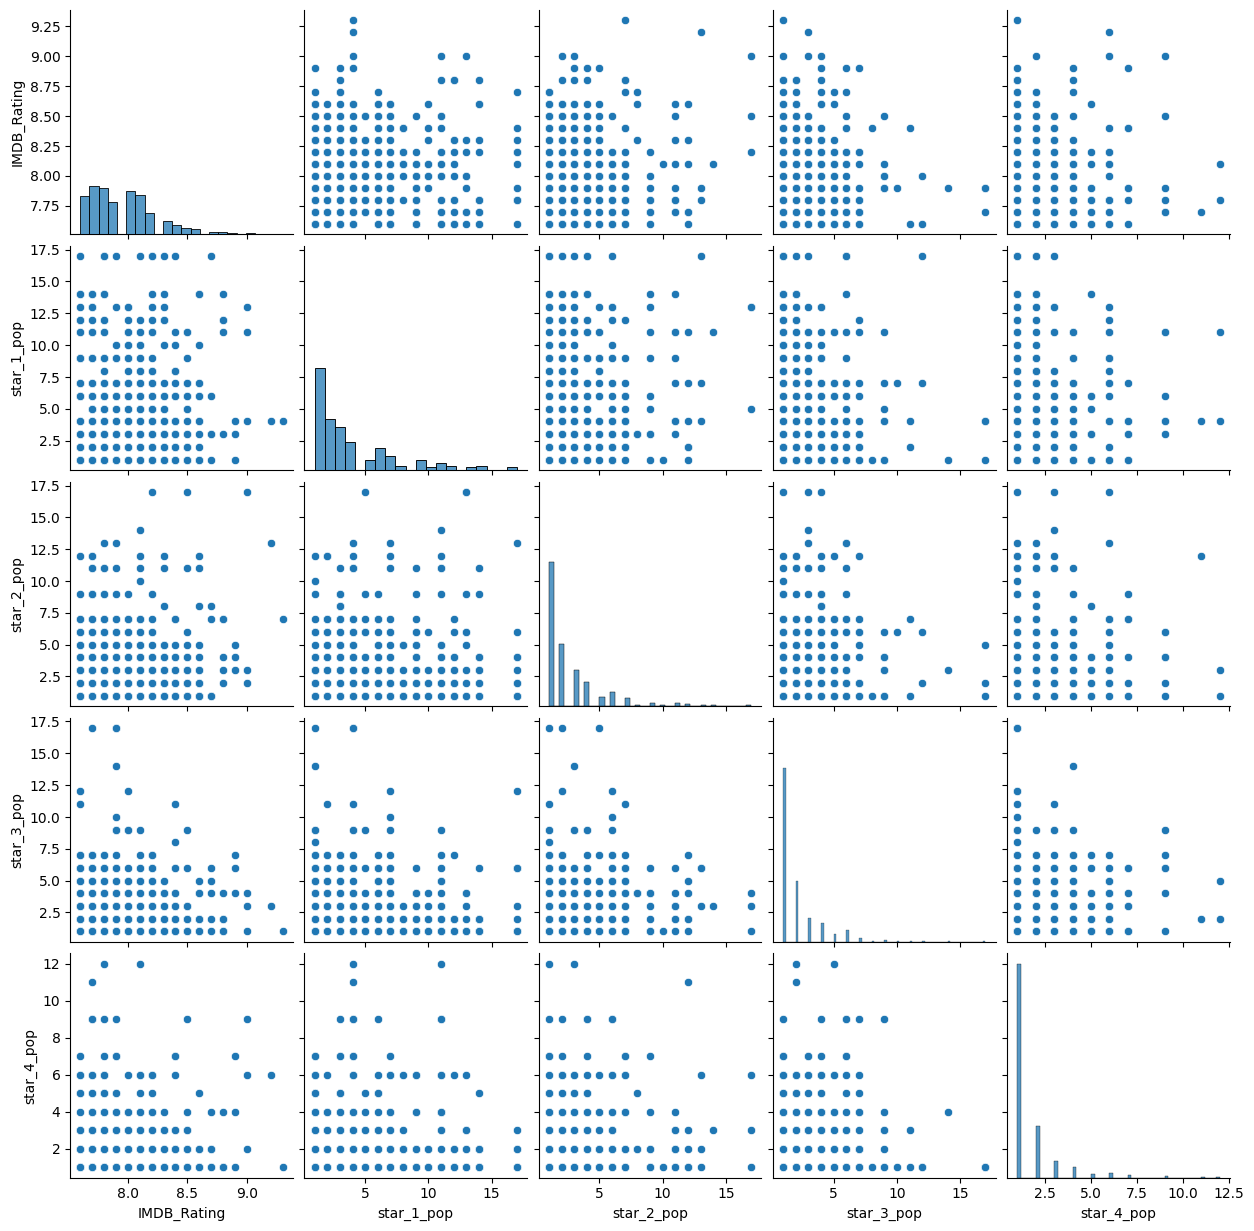

In [32]:
sns.pairplot(data=movies, vars=['IMDB_Rating', 'star_1_pop', 'star_2_pop', 'star_3_pop', 'star_4_pop'])

In [33]:
pop_rate_corr = movies[['IMDB_Rating', 'star_1_pop', 'star_2_pop', 'star_3_pop', 'star_4_pop']].corr()

In [34]:
pop_rate_corr

,IMDB_Rating,star_1_pop,star_2_pop,star_3_pop,star_4_pop
IMDB_Rating,1.000000,0.102936,0.099534,0.001254,0.071339
star_1_pop,0.102936,1.000000,0.276354,0.155905,0.158778
star_2_pop,0.099534,0.276354,1.000000,0.232779,0.216692
star_3_pop,0.001254,0.155905,0.232779,1.000000,0.244960
star_4_pop,0.071339,0.158778,0.216692,0.244960,1.000000


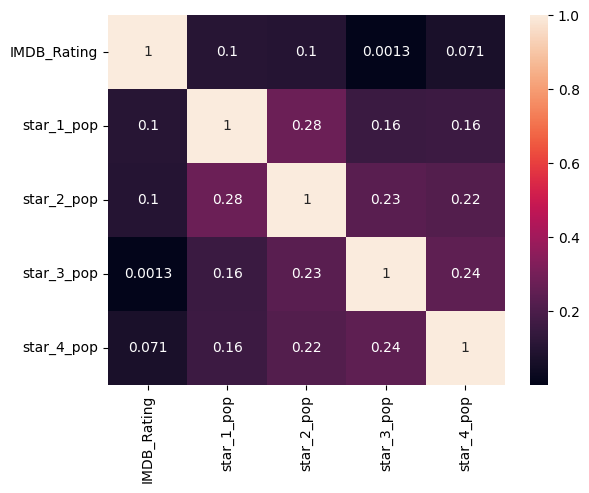

In [35]:
sns.heatmap(pop_rate_corr, annot=True)
plt.show()

# Linear regression
### low correlation probably will cause poor linear regression fit

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
X = movies[['star_1_pop', 'star_2_pop', 'star_3_pop', 'star_4_pop']]
y= movies['IMDB_Rating']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = reg.predict(X_test)
y_pred.shape

(200,)

In [41]:
y_test.shape

(200,)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [43]:
r2 = r2_score(y_test, y_pred)
r2

0.017915381268737596

### a negative r2 means that model poorly fits values

In [44]:
mse = mean_squared_error(y_test, y_pred)
mse

0.0870235001503959

In [45]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.23714780563366822

In [46]:
intercept = reg.intercept_
intercept

7.9003671162569304

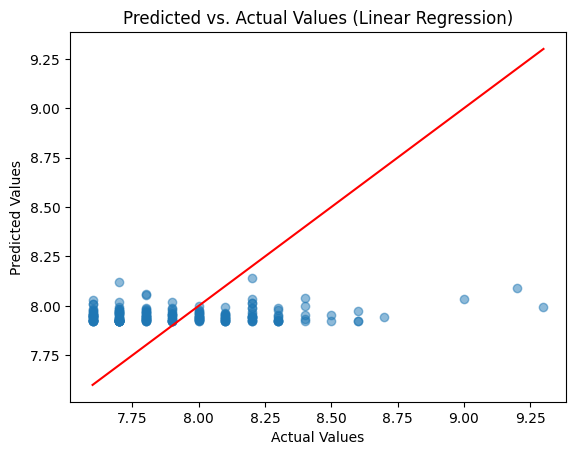

In [47]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear Regression)")
plt.show()

# Model poorly fits values